In [1]:
import numpy as np

/home/anna/stroke-modelling/simpy-pathway-model/classes/units.py:346: DtypeWarning: Columns (17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_regions = pd.read_csv(path_to_file)
/home/anna/stroke-modelling/simpy-pathway-model/classes/units.py:436: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if stroke_unit in df_stroke_teams.index.values:
/home/anna/stroke-modelling/simpy-pathway-model/classes/scenario.py:451: DtypeWarning: Columns (17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_regions = pd.read_csv(path_to_file)


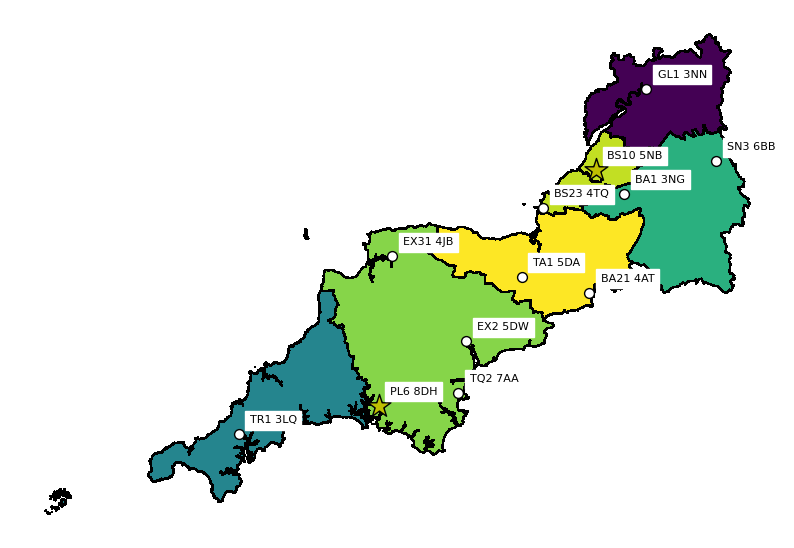

In [2]:
from classes.model import Model
from classes.scenario import Scenario
from classes.setup import Setup

setup = Setup()

# Update Derriford to have no Mobile Stroke Unit:
services_updates = {
    'PL68DH': {'Use_MSU': 0},
    # 'EX25DW': {'Nearest_MT': 'SW170QT'},  # Crazy value to show that it works.
}

# Scenario overwrites default values
scenario = Scenario({
    "setup": setup,
    "run_duration": 5,  # years
    "mt_hub_postcodes":['PL68DH', 'BS105NB'],
    "services_updates":services_updates,
    "region_type_for_lsoa_selection":'ICB'
})

model = Model(scenario)

model.run()

In [3]:
model.results_all

,id,lsoa,stroke_type,closest_ivt_unit,closest_ivt_travel_duration,closest_mt_unit,closest_mt_travel_duration,mt_transfer_unit,mt_transfer_travel_duration,mt_transfer_required,...,time_ambulance_called,time_ambulance_arrival,time_ambulance_leaves_scene,time_admitting_unit_arrival,time_needle,time_transfer_unit_arrival,time_puncture,mRS shift,utility_shift,mRS 0-2
0,3,South Somerset 022B,1,TA15DA,31.6,BS105NB,76.7,BS105NB,65.9,True,...,30.0,60.0,80.0,111.6,141.6,NaN,NaN,-0.510657,0.094115,0.682557
1,1,Torbay 003C,2,TQ27AA,7.9,PL68DH,50.9,PL68DH,52.0,True,...,30.0,60.0,80.0,87.9,117.9,199.9,259.9,-0.543069,0.110419,0.380998
2,4,Swindon 015B,3,SN36BB,13.3,BS105NB,47.7,BS105NB,49.8,True,...,30.0,60.0,80.0,93.3,NaN,NaN,NaN,NaN,NaN,NaN
3,2,South Somerset 023A,2,BA214AT,29.4,BS105NB,77.8,BS105NB,74.5,True,...,30.0,60.0,80.0,109.4,139.4,243.9,303.9,-0.405585,0.084218,0.353319
4,5,Bristol 008F,0,BS105NB,23.0,BS105NB,23.0,BS105NB,0.0,False,...,30.0,60.0,80.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,Wiltshire 028B,3,BA13NG,42.3,BS105NB,49.8,BS105NB,33.7,True,...,30.0,60.0,80.0,122.3,NaN,NaN,NaN,NaN,NaN,NaN
106,107,Cornwall 058C,3,TR13LQ,30.5,PL68DH,96.0,PL68DH,75.6,True,...,30.0,60.0,80.0,110.5,NaN,NaN,NaN,NaN,NaN,NaN
107,109,North Devon 009C,3,EX314JB,12.2,PL68DH,87.4,PL68DH,90.6,True,...,30.0,60.0,80.0,92.2,NaN,NaN,NaN,NaN,NaN,NaN
108,108,Bath and North East Somerset 027C,1,BA13NG,28.4,BS105NB,41.2,BS105NB,33.7,True,...,30.0,60.0,80.0,108.4,138.4,NaN,NaN,-0.517718,0.095339,0.683883


In [4]:
completed_patients_keys = model.pathway.completed_patients[0].keys()
time_cols = [x for x in completed_patients_keys if x[0:4] == 'time']
time_cols.remove('time_onset')

In [5]:
model.results_summary_all

,time_ambulance_called,time_ambulance_arrival,time_ambulance_leaves_scene,time_admitting_unit_arrival,time_needle,time_transfer_unit_arrival,time_puncture,mRS shift,utility_shift,mRS 0-2
statistic,,,,,,,,,,
mean,30.0,60.0,80.0,102.424545,132.552941,223.947619,241.375862,-0.564110,0.108134,0.561689
std,0.0,0.0,0.0,9.225475,9.024551,25.902676,73.571853,0.159967,0.031398,0.149149


In [6]:
model.results_summary_by_admitting_unit

time_ambulance_called      time_ambulance_arrival       \
                                  mean  std                   mean  std   
closest_ivt_unit                                                          
BA13NG                            30.0  0.0                   60.0  0.0   
BA214AT                           30.0  0.0                   60.0  0.0   
BS105NB                           30.0  0.0                   60.0  0.0   
BS234TQ                           30.0  0.0                   60.0  0.0   
EX25DW                            30.0  0.0                   60.0  0.0   
EX314JB                           30.0  0.0                   60.0  0.0   
GL13NN                            30.0  0.0                   60.0  0.0   
PL68DH                            30.0  0.0                   60.0  0.0   
SN36BB                            30.0  0.0                   60.0  0.0   
SP28BJ                            30.0  0.0                   60.0  0.0   
TA15DA                            30.0  0.0                   60.0  0.0   
TQ27AA                            30.0  0.0                   60.0  0.0   
TR13LQ                            30.0  0.0                   60.0  0.0   

                 time_ambulance_leaves_scene      time_admitting_unit_arrival  \
                                        mean  std                        mean   
closest_ivt_unit                                                                
BA13NG                                  80.0  0.0                  103.840000   
BA214AT                                 80.0  0.0                  104.033333   
BS105NB                                 80.0  0.0                   99.300000   
BS234TQ                                 80.0  0.0                  103.600000   
EX25DW                                  80.0  0.0                  102.450000   
EX314JB                                 80.0  0.0                  107.900000   
GL13NN                                  80.0  0.0                  102.541667   
PL68DH                                  80.0  0.0                  105.884615   
SN36BB                                  80.0  0.0                   98.190909   
SP28BJ                                  80.0  0.0                  101.000000   
TA15DA                                  80.0  0.0                  101.375000   
TQ27AA                                  80.0  0.0                   94.366667   
TR13LQ                                  80.0  0.0                  104.416667   

                            time_needle            time_transfer_unit_arrival  \
                        std        mean        std                       mean   
closest_ivt_unit                                                                
BA13NG             7.714085  131.900000   5.649336                 191.300000   
BA214AT            4.680100  134.033333   4.680100                 238.533333   
BS105NB            4.675632  127.844444   5.207473                        NaN   
BS234TQ            3.601851  133.883333   3.859231                 204.966667   
EX25DW             8.056488  133.250000   8.222935                        NaN   
EX314JB           13.437194  139.616667  14.524933                 278.850000   
GL13NN             7.442807  134.062500   8.274218                 211.750000   
PL68DH            11.032365  132.175000   8.430853                        NaN   
SN36BB             8.248328  138.333333   9.295339                 223.500000   
SP28BJ            12.117591  131.000000  12.117591                 191.400000   
TA15DA            10.500913  133.000000  12.229473                 224.600000   
TQ27AA             5.224430  124.366667   5.707305                 199.900000   
TR13LQ            12.298523  131.100000  14.418275                 240.366667   

                            time_puncture            mRS shift            \
                        std          mean        std      mean       std   
closest_ivt_unit                                                      

In [7]:
model.results_all[np.isnan(model.results_all['time_puncture']) == False]

,id,lsoa,stroke_type,closest_ivt_unit,closest_ivt_travel_duration,closest_mt_unit,closest_mt_travel_duration,mt_transfer_unit,mt_transfer_travel_duration,mt_transfer_required,...,time_ambulance_called,time_ambulance_arrival,time_ambulance_leaves_scene,time_admitting_unit_arrival,time_needle,time_transfer_unit_arrival,time_puncture,mRS shift,utility_shift,mRS 0-2
1,1,Torbay 003C,2,TQ27AA,7.9,PL68DH,50.9,PL68DH,52.0,True,...,30.0,60.0,80.0,87.9,117.9,199.9,259.9,-0.543069,0.110419,0.380998
3,2,South Somerset 023A,2,BA214AT,29.4,BS105NB,77.8,BS105NB,74.5,True,...,30.0,60.0,80.0,109.4,139.4,243.9,303.9,-0.405585,0.084218,0.353319
14,15,Cornwall 053E,2,TR13LQ,21.9,PL68DH,87.4,PL68DH,75.6,True,...,30.0,60.0,80.0,101.9,131.9,237.5,297.5,-0.425331,0.088000,0.357290
16,16,North Somerset 024C,2,BS234TQ,19.8,BS105NB,43.4,BS105NB,43.4,True,...,30.0,60.0,80.0,99.8,129.8,203.2,263.2,-0.532618,0.108438,0.378893
23,18,Wiltshire 002A,2,SN36BB,33.7,BS105NB,45.5,BS105NB,49.8,True,...,30.0,60.0,80.0,113.7,143.7,223.5,283.5,-0.468826,0.096308,0.366043
24,19,Bristol 049D,2,BA13NG,21.9,BS105NB,24.1,BS105NB,33.7,True,...,30.0,60.0,80.0,101.9,131.9,195.6,255.6,-0.556721,0.113004,0.383749
27,28,Bristol 021D,2,BS105NB,16.5,BS105NB,16.5,BS105NB,0.0,False,...,30.0,60.0,80.0,96.5,126.5,NaN,126.5,-0.983666,0.192008,0.469035
32,31,Sedgemoor 012D,2,TA15DA,28.4,BS105NB,62.7,BS105NB,65.9,True,...,30.0,60.0,80.0,108.4,138.4,234.3,294.3,-0.435237,0.089894,0.359282
36,34,South Somerset 021A,2,BA214AT,20.8,BS105NB,87.4,BS105NB,74.5,True,...,30.0,60.0,80.0,100.8,130.8,235.3,295.3,-0.432139,0.089302,0.358659
38,35,Torridge 008C,2,EX314JB,48.8,PL68DH,56.3,PL68DH,90.6,True,...,30.0,60.0,80.0,128.8,158.8,279.4,339.4,-0.297601,0.063446,0.331673


In [8]:
model.results_all[np.isnan(model.results_all['time_needle']) == False]

,id,lsoa,stroke_type,closest_ivt_unit,closest_ivt_travel_duration,closest_mt_unit,closest_mt_travel_duration,mt_transfer_unit,mt_transfer_travel_duration,mt_transfer_required,...,time_ambulance_called,time_ambulance_arrival,time_ambulance_leaves_scene,time_admitting_unit_arrival,time_needle,time_transfer_unit_arrival,time_puncture,mRS shift,utility_shift,mRS 0-2
0,3,South Somerset 022B,1,TA15DA,31.6,BS105NB,76.7,BS105NB,65.9,True,...,30.0,60.0,80.0,111.6,141.6,NaN,NaN,-0.510657,0.094115,0.682557
1,1,Torbay 003C,2,TQ27AA,7.9,PL68DH,50.9,PL68DH,52.0,True,...,30.0,60.0,80.0,87.9,117.9,199.9,259.9,-0.543069,0.110419,0.380998
3,2,South Somerset 023A,2,BA214AT,29.4,BS105NB,77.8,BS105NB,74.5,True,...,30.0,60.0,80.0,109.4,139.4,243.9,303.9,-0.405585,0.084218,0.353319
6,6,Cotswold 002A,1,GL13NN,39.1,OX39DU,44.5,BS105NB,46.6,True,...,30.0,60.0,80.0,119.1,149.1,NaN,NaN,-0.494072,0.091235,0.679437
7,8,Bath and North East Somerset 023D,1,BA13NG,25.1,BS105NB,38.0,BS105NB,33.7,True,...,30.0,60.0,80.0,105.1,135.1,NaN,NaN,-0.524990,0.096598,0.685247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,104,Bristol 021D,2,BS105NB,16.5,BS105NB,16.5,BS105NB,0.0,False,...,30.0,60.0,80.0,96.5,126.5,NaN,126.5,-0.983666,0.192008,0.469035
103,105,North Somerset 004D,2,BS105NB,26.2,BS105NB,26.2,BS105NB,0.0,False,...,30.0,60.0,80.0,106.2,136.2,NaN,136.2,-0.950512,0.186007,0.462498
104,102,Cheltenham 008E,2,GL13NN,19.8,BS105NB,49.8,BS105NB,46.6,True,...,30.0,60.0,80.0,99.8,129.8,206.4,266.4,-0.522505,0.106520,0.376855
108,108,Bath and North East Somerset 027C,1,BA13NG,28.4,BS105NB,41.2,BS105NB,33.7,True,...,30.0,60.0,80.0,108.4,138.4,NaN,NaN,-0.517718,0.095339,0.683883
